# Метрики регрессии. Недостатки аналитического решения


✍ Итак, ранее мы с вами пришли к тому, что нам необходимо научиться оценивать качество модели с помощью какого-то показателя (или нескольких показателей). Такой показатель в машинном обучении называется метрикой. И для каждого класса задач машинного обучения существуют свои метрики.

**Метрика** — это численное выражение качества моделирования.

Для оценки качества решения задачи регрессии существует множество метрик. Давайте рассмотрим самые основные и часто используемые.

## МЕТРИКИ РЕГРЕССИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Возьмём первые пять наблюдений из нашей таблицы и предсказанные для них моделью *lr_lstat* ответы:

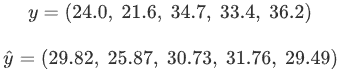

На этих значениях мы будем рассматривать следующие метрики:



### 1. Средняя абсолютная ошибка — MAE (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

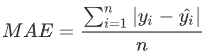

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

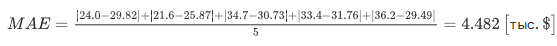

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на 4.482 тысячи долларов.

Много ли это? Хороший вопрос, на который без эксперта-оценщика недвижимости будет сложно дать ответ. Однако можно попробовать посчитать ошибку в процентах, ведь в процентах всё воспринимается легче, и для этого нам пригодится следующая метрика — ***MAPE.***

### 2. Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

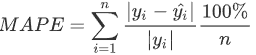

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

Например, средняя ошибка — 2 тысячи долларов. Это много или мало? Смотря для чего... А вот средняя ошибка, равная 80 % — это много или мало? Определённо много.

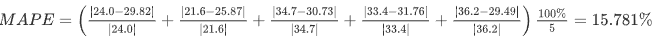

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на 15.781 %. Это довольно неплохой результат.

### 3. Средняя квадратическая ошибка — MSE

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

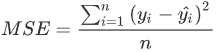

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.

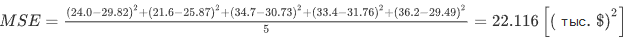

Таким образом, для нашего примера квадрат отклонения составляет 22.116 тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.



### 4. Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения RMSE надо просто извлечь квадратный корень из MSE:

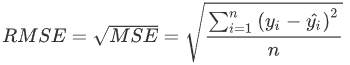

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.

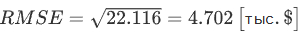

Преимущества и недостатки этой метрики такие же, как и у MSE, к преимуществам добавляется только понятная размерность.

### 5. Коэффициент детерминации (R²)

се рассматриваемые ранее метрики имели масштаб от 0 до +ထ. Чем это плохо?

А что если нам скажут, что MSE для модели составляет 32? Должны ли мы улучшить модель, или она достаточно хороша? А что если MSE = 0.4?

На самом деле, трудно понять, хороша модель или нет, не сравнив её показатели с теми же показателями других моделей.

Коэффициент детерминации, или R², является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с MSE, но его преимущество в том, что R² всегда находится в промежутке между -ထ и 1.

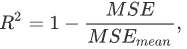

где

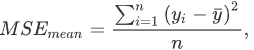

где y- — среднее по вектору правильных ответов.

То есть R² показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Посмотрим, как считается R². Сначала рассчитаем среднее по правильным ответам:

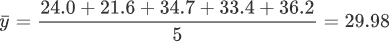

Теперь рассчитаем MSE(mean):



И, наконец, сам R²:

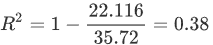

Есть ещё одна интерпретация данной метрики. Статистически показатель R² описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным R² считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения R² говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.

### Давайте обобщим всё вышесказанное в виде таблицы:

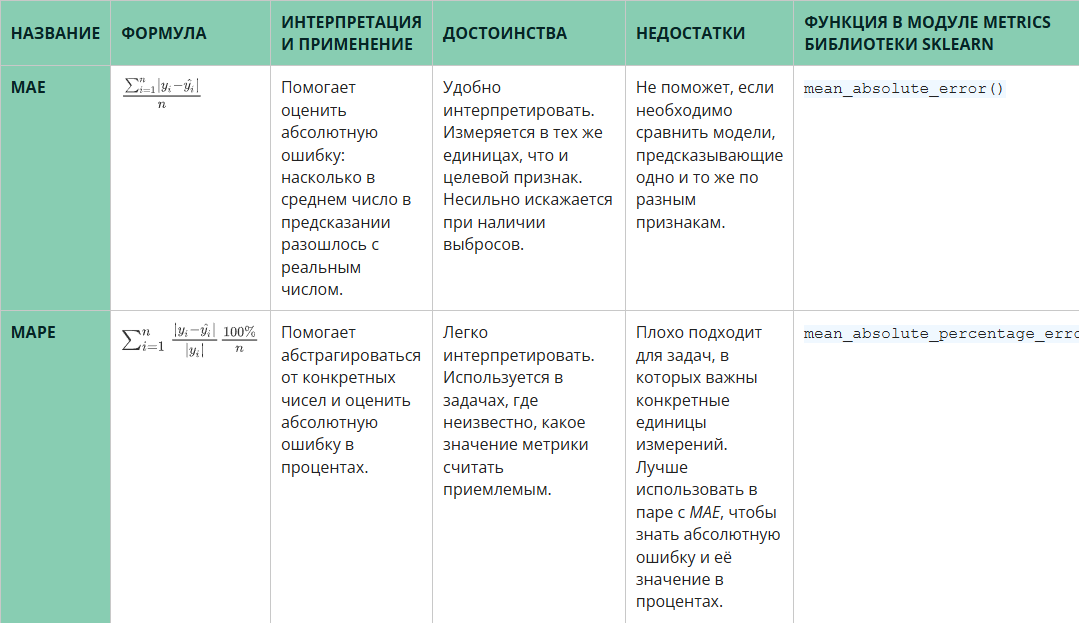
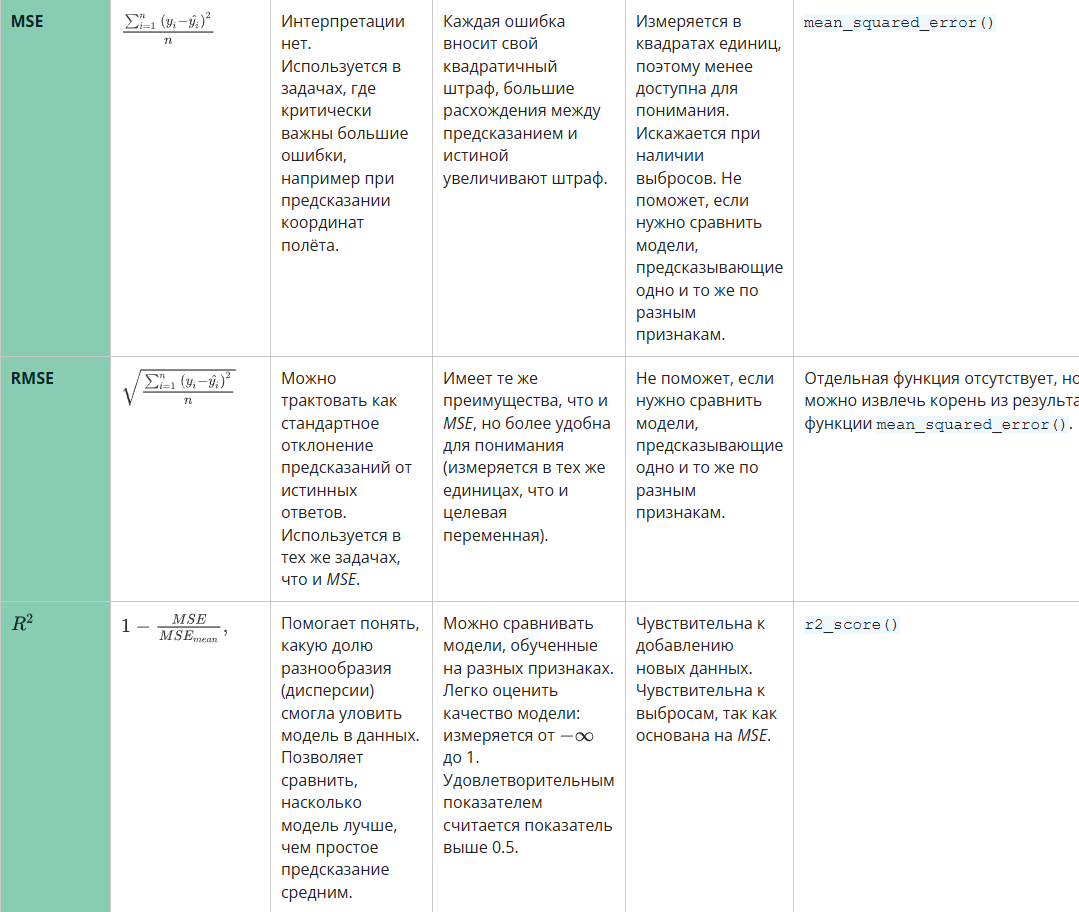


## РАСЧЁТ МЕТРИК НА PYTHON

Настало время проверить качество построенных нами ранее моделей линейной регрессии: *lr_lstat* и *lr_full.*

Весь набор функций для вычисления метрик в sklearn находится в модуле metrics. Давайте его импортируем:

In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]
y_predict = lr_lstat.predict(X)

w0: 34.5538408793831
w1: [-0.95004935]


**Функции, которые нам понадобятся:**

- *mean_absolute_error()* — расчёт MAE;
- *mean_squared_error()* — расчёт MSE;
- *mean_absolute_percentage_error()* — расчёт MAPE;
- *r2_score()* — расчёт коэффициента детерминации R².

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

**Примечание.** Для расчёта метрики RMSE нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из MSE.

Из-за особенностей реализации функция *mean_absolute_percentage_error()* возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели *lr_lstat*: сделаем предсказание на основании признака *LSTAT* и передадим истинные и предсказанные медианные цены в функции для расчёта метрик:

In [7]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))
 
# MAE score: 4.505 thou. $
# RMSE score: 6.203 thou. $
# MAPE score: 21.352 %
# R2 score: 0.544

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


Проделываем ту же самую операцию для второй модели линейной регрессии, *lr_full:*

In [8]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [9]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))
 

# MAE score: 3.271 thou. $
# RMSE score: 4.679 thou. $
# MAPE score: 16.417 %
# R2 score: 0.741

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


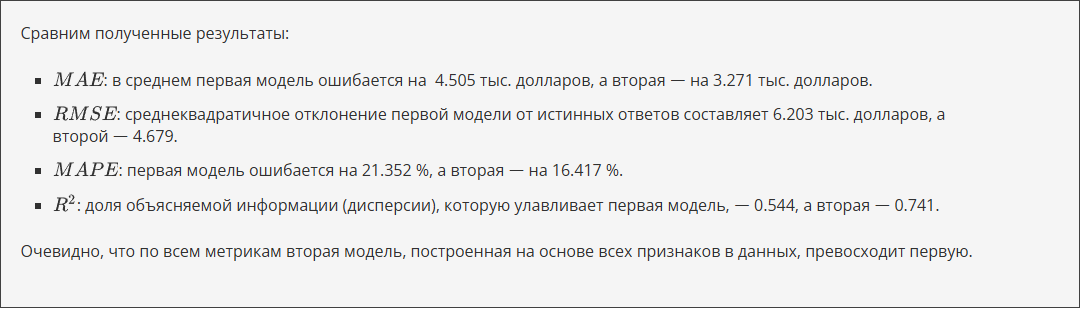

### Задание 3.1

Что позволяет определить метрика?


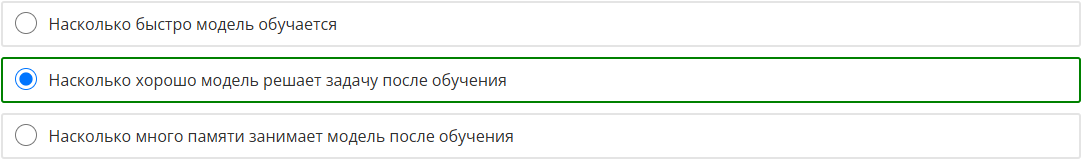

### Задание 3.2

У вас есть истинные ответы y_true = [1.23, 2.35, 2.75] и предсказания модели y_pred = [1.01, 12.3, 2.74]. Посчитайте метрику RMSE, ответ округлите до двух знаков после точки-разделителя.

In [12]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.75


### Задание 3.3

Чему равен коэффициент детерминации на следующих данных?
Истинные ответы: y_true = [22.4, 20.6, 23.9, 22.0, 11.9]

Предсказанные ответы: y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

Ответ округлите до двух знаков после точки-разделителя.


In [14]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


### Задание 3.4

Для какой из моделей коэффициент детерминации будет больше? Обе модели построены методом OLS.

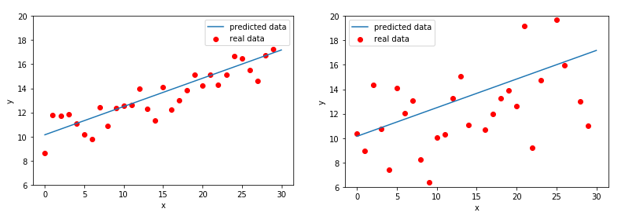

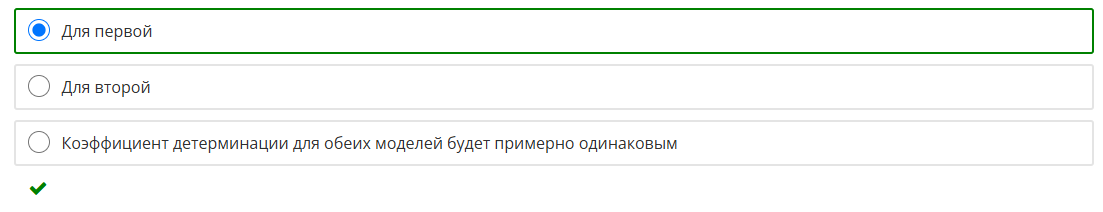

### Задание 3.5

Для какой из моделей MSE будет больше? Обе модели построены методом OLS.

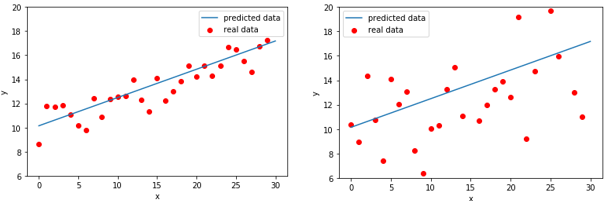

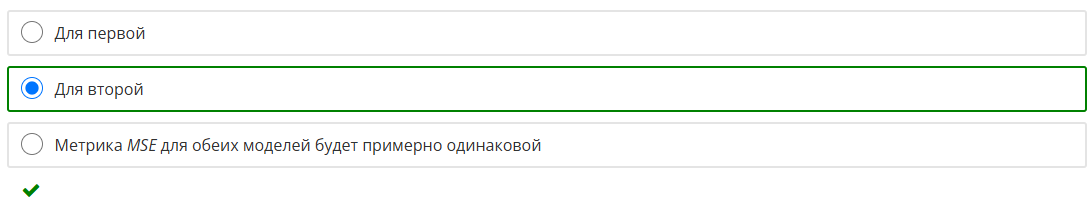

### Задание 3.6

В результате моделирования была получена метрика . Что это значит?

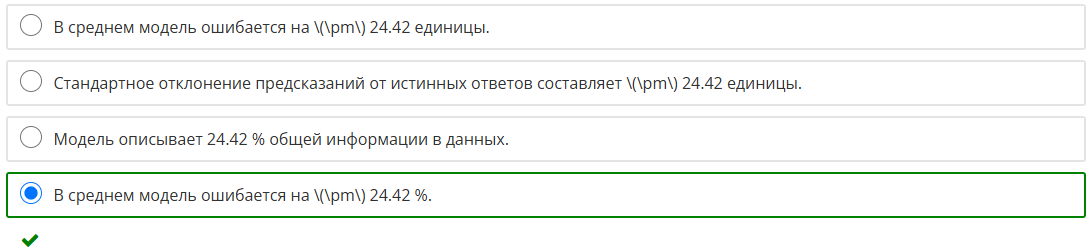

### Задание 3.7

Задача: определить, насколько хорошо модель предсказывает заработную плату соискателя. С заказчиком было согласовано, что среднее расхождение модели должно быть 10 тыс. руб.

Какую метрику будете использовать для оценки качества?

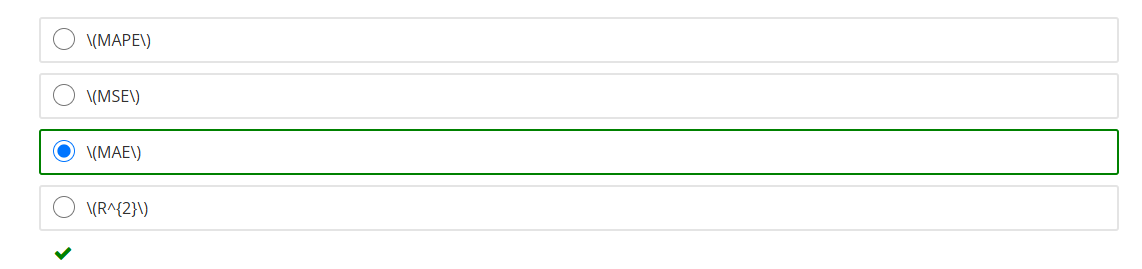

## НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

Ранее мы с вами рассмотрели, что такое модель линейной регрессии, и научились рассчитывать её параметры с помощью аналитического подхода — метода наименьших квадратов.



Метод наименьших квадратов позволяет очень просто получить коэффициенты , подставив таблицу в формулу. Вот, собственно, и всё «обучение».

Существует [теорема Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. Мы ещё вернемся к этой теореме, когда будем говорить об МНК в модулях по линейной алгебре.

Казалось бы, относительно простая математика: надо всего лишь перемножить матрицы между собой и получить ответ. Особенно простой эта задача должна быть для компьютера. Но нам так кажется, поскольку мы ранее не сталкивались с матричным умножением и будем говорить о нём только в модулях по линейной алгебре.

Оказывается, у такого простого подхода есть один большой минус — это работа с большим количеством признаков.

Давайте внимательно посмотрим на операцию обращения матриц (возведение в степень -1):



Таблица X имеет размер (n, m), то есть у неё n строк и m столбцов. Таблица X(T) — это результат транспонирования матриц (замены строк и столбцов местами), то есть её размерность — (m,n). Забегая вперёд, отметим, что по правилам умножения матриц результат умножения будет иметь размерность (n,m) * (n,m) = (m, m), где  — это число столбцов.

А теперь представим, что у нас не 13 признаков, а 1300. То есть матрица Q имеет размерность (n, m) = (1300, 1300). Но мы делаем вычисления на компьютере, так ведь? Сложностей быть не должно, но... В модулях по линейной алгебре мы увидим, что обращение матриц — очень ресурсозатратная операция. У неё кубическая сложность, то есть если размер матрицы (m, m) — , то на её обращение понадобится m^3 операций. Для нашего примера это 1300^3 = 2197000000!

Обращение матриц больших размеров может стать очень трудоёмким процессом при работе с большими объёмами данных.

Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

**Что это такое?**

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод *fit()* для модели *LinearRegression* и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица  в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 

Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 

Проблема решается с помощью регуляризации.

### Задание 3.8

Почему линейная регрессия, несмотря на то что является простой моделью, может долго обучаться?

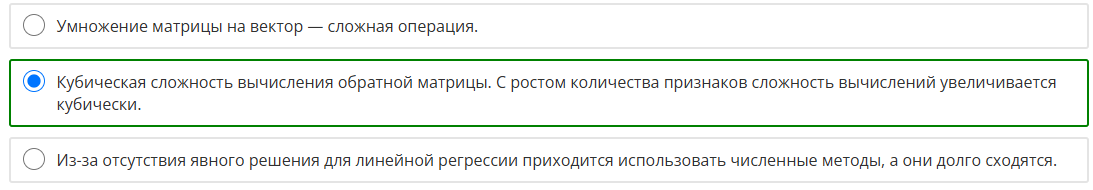

### Задание 3.9

Что такое инкрементальное обучение?

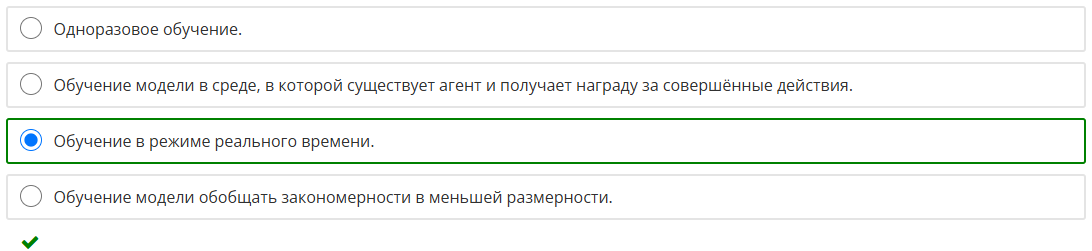